In [1]:
# 1. Load the cleaned data
from pathlib import Path
import pandas as pd

processed_path = Path('../data/processed_data.csv')
df = pd.read_csv(processed_path)

# Reconvert date columns if needed
date_cols = ['cdc_case_earliest_dt', 'cdc_report_dt', 'onset_dt', 'pos_spec_dt']
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')


In [2]:
# 2. Summary statistics
# Count of cases by demographic variables (sex, age_group, race_ethnicity_combined)
# Rates of hospitalization, ICU admission, deaths
# Distribution of days_to_report

# Basic demographics counts
print(df['sex'].value_counts(dropna=False))
print(df['age_group'].value_counts(dropna=False))
print(df['race_ethnicity_combined'].value_counts(dropna=False))

# Outcome rates
print(df[['hosp_yn', 'icu_yn', 'death_yn']].mean())

# Days to report stats
print(df['days_to_report'].describe())


sex
Female    4763
Male      4256
Name: count, dtype: int64
age_group
50 - 59 Years    4763
10 - 19 Years    4256
Name: count, dtype: int64
race_ethnicity_combined
White, Non-Hispanic    4763
Unknown                4256
Name: count, dtype: int64
hosp_yn     0.043464
icu_yn      0.026119
death_yn    0.004744
dtype: float64
count    9019.000000
mean       78.736224
std       188.148511
min      -467.000000
25%         1.000000
50%         6.000000
75%        26.000000
max      1483.000000
Name: days_to_report, dtype: float64


In [3]:
# 3. Cross-tabulations & risk stratification
# Show how outcomes vary by age group, sex, race.
# Hospitalization rate by age group
hosp_by_age = pd.crosstab(df['age_group'], df['hosp_yn'], normalize='index') * 100
print(hosp_by_age)

# Death rate by race
death_by_race = pd.crosstab(df['race_ethnicity_combined'], df['death_yn'], normalize='index') * 100
print(death_by_race)


hosp_yn              0.0       1.0
age_group                         
10 - 19 Years  98.417132  1.582868
50 - 59 Years  94.176207  5.823793
death_yn                       0.0       1.0
race_ethnicity_combined                     
Unknown                  99.939686  0.060314
White, Non-Hispanic      99.257232  0.742768


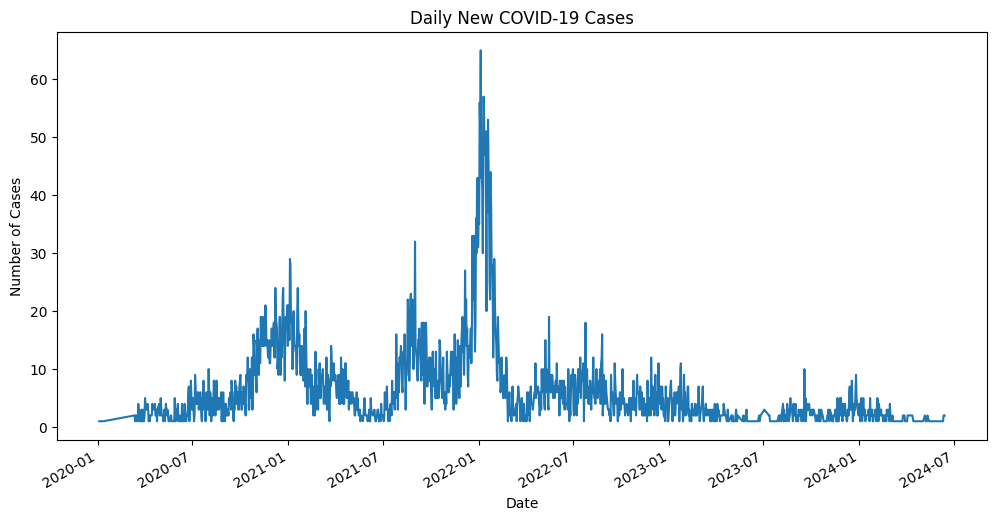

In [4]:
# 4. Time series trends
# Number of new cases over time, reporting lag trends.
import matplotlib.pyplot as plt

# Cases by earliest case date
cases_by_date = df.groupby('cdc_case_earliest_dt').size()

plt.figure(figsize=(12,6))
cases_by_date.plot()
plt.title('Daily New COVID-19 Cases')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.show()


In [6]:
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create visuals directory if it doesn't exist
visuals_dir = Path('../visuals')
visuals_dir.mkdir(parents=True, exist_ok=True)

plt.style.use('seaborn-whitegrid')


C:\Users\asian\AppData\Local\Temp\ipykernel_14668\3696603963.py:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


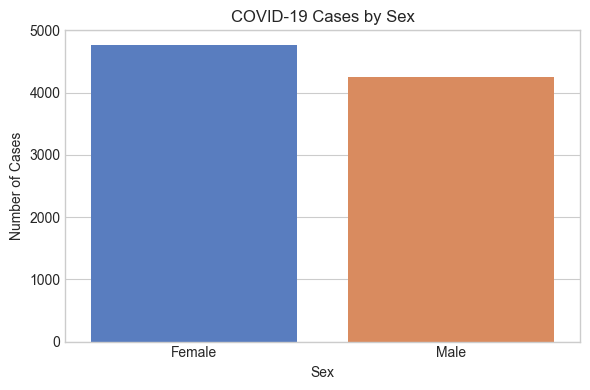

In [11]:
# 1. Cases by Sex
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='sex', palette='muted')
plt.title('COVID-19 Cases by Sex')
plt.xlabel('Sex')
plt.ylabel('Number of Cases')
plt.tight_layout()
plt.savefig(visuals_dir / 'cases_by_sex.png')
plt.show()
plt.close()

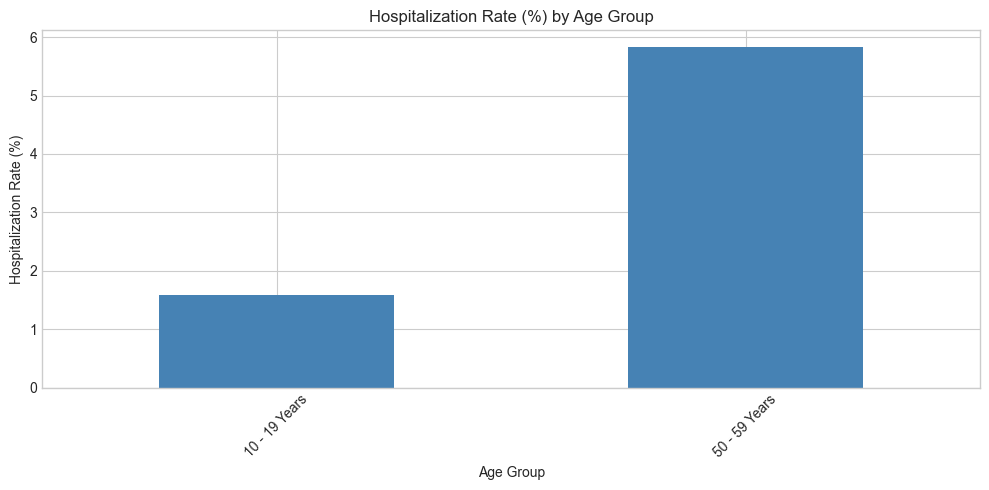

In [9]:
# 2. Hospitalization Rate by Age Group
age_hosp_rate = df.groupby('age_group')['hosp_yn'].mean().sort_index() * 100

plt.figure(figsize=(10,5))
age_hosp_rate.plot(kind='bar', color='steelblue')
plt.title('Hospitalization Rate (%) by Age Group')
plt.ylabel('Hospitalization Rate (%)')
plt.xlabel('Age Group')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(visuals_dir / 'hospitalization_rate_by_age_group.png')
plt.show()
plt.close()

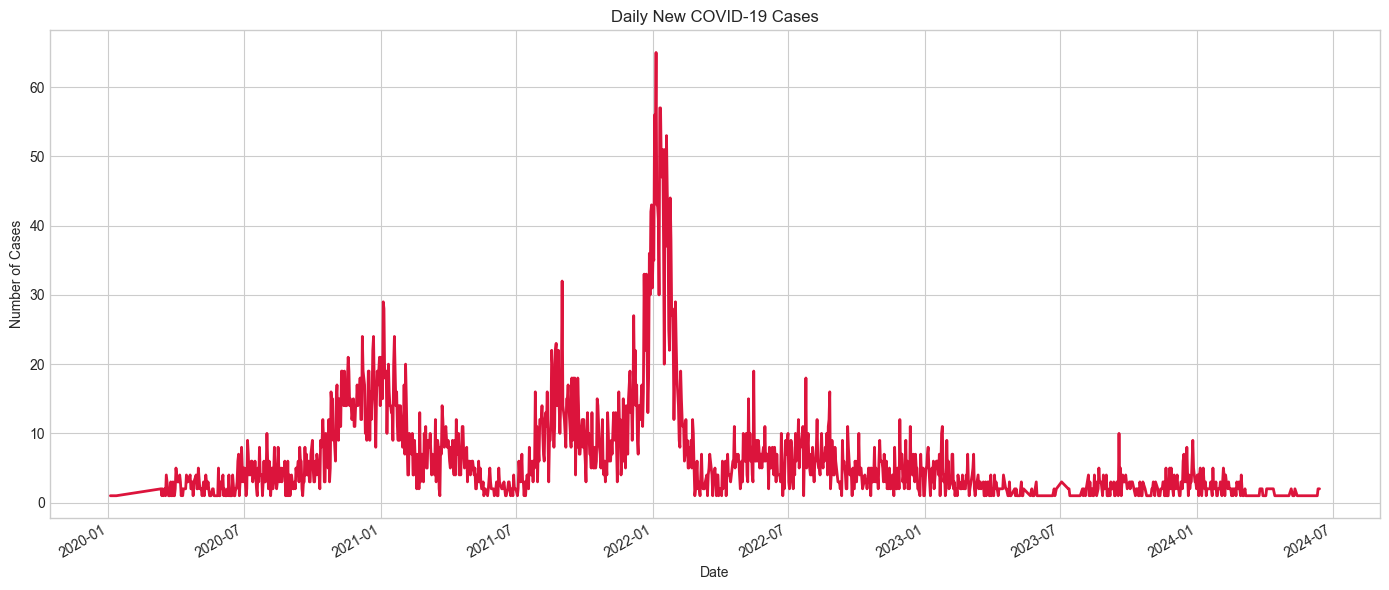

In [10]:
# 3. Daily New Cases
cases_by_date = df.groupby('cdc_case_earliest_dt').size()

plt.figure(figsize=(14,6))
cases_by_date.plot(linewidth=2, color='crimson')
plt.title('Daily New COVID-19 Cases')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.grid(True)
plt.tight_layout()
plt.savefig(visuals_dir / 'daily_cases_over_time.png')
plt.show()
plt.close()

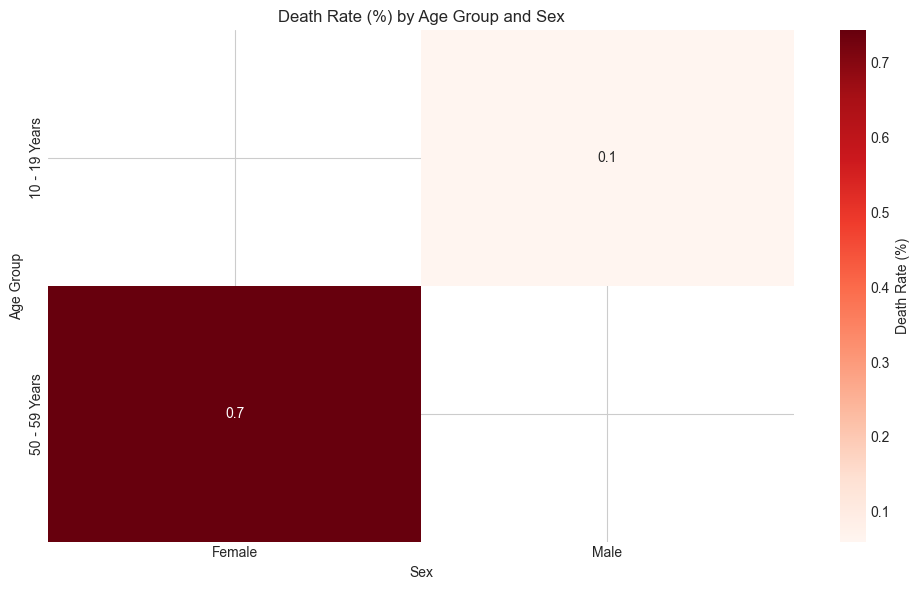

In [12]:
# 4. Death Rate by Age Group and Sex
ct = pd.crosstab(index=df['age_group'], columns=df['sex'], values=df['death_yn'], aggfunc='mean') * 100

plt.figure(figsize=(10,6))
sns.heatmap(ct, annot=True, fmt=".1f", cmap='Reds', cbar_kws={'label': 'Death Rate (%)'})
plt.title('Death Rate (%) by Age Group and Sex')
plt.ylabel('Age Group')
plt.xlabel('Sex')
plt.tight_layout()
plt.savefig(visuals_dir / 'death_rate_by_age_and_sex.png')
plt.show()
plt.close()

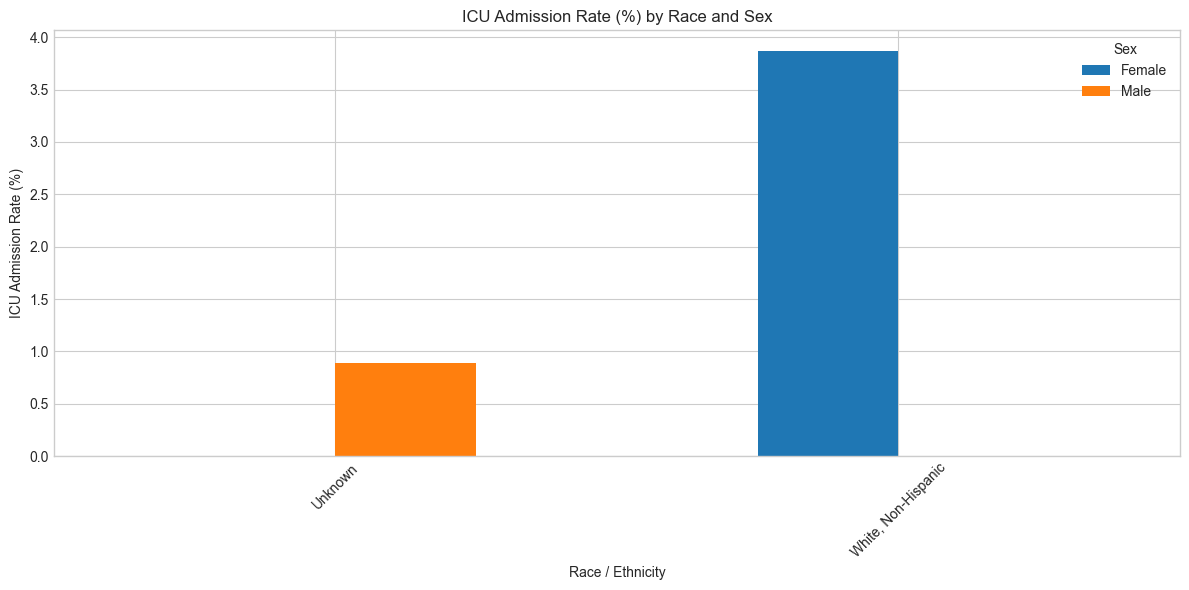

In [13]:
# 5. ICU Rate by Race and Sex
ct_icu = pd.crosstab(df['race_ethnicity_combined'], df['sex'], values=df['icu_yn'], aggfunc='mean') * 100
ct_icu = ct_icu.reset_index()

ct_icu.plot(x='race_ethnicity_combined', kind='bar', figsize=(12,6))
plt.title('ICU Admission Rate (%) by Race and Sex')
plt.ylabel('ICU Admission Rate (%)')
plt.xlabel('Race / Ethnicity')
plt.xticks(rotation=45)
plt.legend(title='Sex')
plt.tight_layout()
plt.savefig(visuals_dir / 'icu_rate_by_race_and_sex.png')
plt.show()
plt.close()

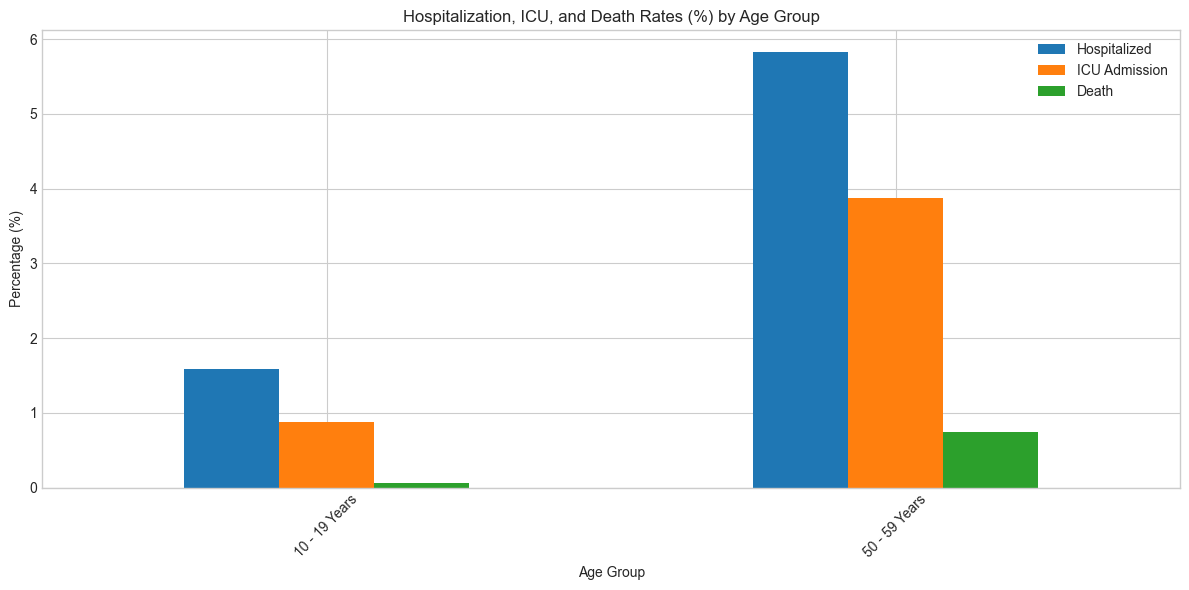

In [14]:
# 6. Combined Outcome Rates by Age Group
outcome_rates = df.groupby('age_group')[['hosp_yn', 'icu_yn', 'death_yn']].mean() * 100

outcome_rates.plot(kind='bar', figsize=(12,6))
plt.title('Hospitalization, ICU, and Death Rates (%) by Age Group')
plt.ylabel('Percentage (%)')
plt.xlabel('Age Group')
plt.xticks(rotation=45)
plt.legend(['Hospitalized', 'ICU Admission', 'Death'])
plt.tight_layout()
plt.savefig(visuals_dir / 'outcome_rates_by_age_group.png')
plt.show()
plt.close()

In [ ]:
#  Automated EDA Reporting Framework

In [17]:
from pathlib import Path
import pandas as pd
from pprint import pprint

In [18]:
# -----------------------------
# Load cleaned data
# -----------------------------
df = pd.read_csv(Path('../data/processed_data.csv'))

In [19]:
# Re-parse date columns if necessary
date_cols = ['cdc_case_earliest_dt', 'cdc_report_dt', 'onset_dt', 'pos_spec_dt']
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')


In [20]:
# -----------------------------
# Initialize summary container
# -----------------------------
eda_summary = {}

In [21]:
# -----------------------------
# 1. Demographic Distributions
# -----------------------------
sex_dist = df['sex'].value_counts(normalize=True).round(3)
age_dist = df['age_group'].value_counts(normalize=True).round(3)

eda_summary['sex_distribution'] = sex_dist.to_dict()
eda_summary['age_distribution'] = age_dist.to_dict()

print("📊 Sex Distribution (%):\n", sex_dist * 100, "\n")
print("📊 Age Group Distribution (%):\n", age_dist * 100, "\n")


📊 Sex Distribution (%):
 sex
Female    52.8
Male      47.2
Name: proportion, dtype: float64 

📊 Age Group Distribution (%):
 age_group
50 - 59 Years    52.8
10 - 19 Years    47.2
Name: proportion, dtype: float64 



In [23]:
# -----------------------------
# 2. Outcome Rates
# -----------------------------
hosp_rate = df['hosp_yn'].mean().round(3)
icu_rate = df['icu_yn'].mean().round(3)
death_rate = df['death_yn'].mean().round(3)

eda_summary['hospitalization_rate'] = hosp_rate
eda_summary['icu_rate'] = icu_rate
eda_summary['death_rate'] = death_rate

print(f"🏥 Hospitalization Rate: {hosp_rate * 100:.2f}%")
print(f"🛏️ ICU Admission Rate: {icu_rate * 100:.2f}%")
print(f"💀 Death Rate: {death_rate * 100:.2f}%\n")

🏥 Hospitalization Rate: 4.30%
🛏️ ICU Admission Rate: 2.60%
💀 Death Rate: 0.50%



In [24]:
# -----------------------------
# 3. Days to Report Summary
# -----------------------------
days_report_stats = df['days_to_report'].describe().round(2)
eda_summary['days_to_report_stats'] = days_report_stats.to_dict()

print("⏱️ Days from Case to Report:\n", days_report_stats, "\n")


⏱️ Days from Case to Report:
 count    9019.00
mean       78.74
std       188.15
min      -467.00
25%         1.00
50%         6.00
75%        26.00
max      1483.00
Name: days_to_report, dtype: float64 



In [25]:
# -----------------------------
# 4. Peak Case Day
# -----------------------------
peak_day = df['cdc_case_earliest_dt'].value_counts().idxmax()
peak_count = df['cdc_case_earliest_dt'].value_counts().max()

eda_summary['peak_case_day'] = {
    'date': str(peak_day.date()),
    'case_count': int(peak_count)
}

print(f"📈 Peak Day of Reported Cases: {peak_day.date()} with {peak_count} cases\n")


📈 Peak Day of Reported Cases: 2022-01-05 with 65 cases



In [26]:
# -----------------------------
# 5. Full Dictionary
# -----------------------------
print("🧾 Full EDA Summary Dictionary:")
pprint(eda_summary)

🧾 Full EDA Summary Dictionary:
{'age_distribution': {'10 - 19 Years': 0.472, '50 - 59 Years': 0.528},
 'days_to_report_stats': {'25%': 1.0,
                          '50%': 6.0,
                          '75%': 26.0,
                          'count': 9019.0,
                          'max': 1483.0,
                          'mean': 78.74,
                          'min': -467.0,
                          'std': 188.15},
 'death_rate': 0.005,
 'hospitalization_rate': 0.043,
 'icu_rate': 0.026,
 'peak_case_day': {'case_count': 65, 'date': '2022-01-05'},
 'sex_distribution': {'Female': 0.528, 'Male': 0.472}}


In [27]:
# -----------------------------
# 6. Save to Markdown Report
# -----------------------------
report_path = Path('../reports/covid19_analysis_report.md')
report_path.parent.mkdir(parents=True, exist_ok=True)

with open(report_path, 'w') as f:
    f.write('# COVID-19 Tracker Analysis Report\n\n')
    f.write('## Key Metrics & Findings\n\n')

    f.write('### Demographic Distributions\n')
    f.write(f"- Sex: {eda_summary['sex_distribution']}\n")
    f.write(f"- Age Groups: {eda_summary['age_distribution']}\n\n")

    f.write('### Outcome Rates\n')
    f.write(f"- Hospitalization Rate: {eda_summary['hospitalization_rate'] * 100:.1f}%\n")
    f.write(f"- ICU Admission Rate: {eda_summary['icu_rate'] * 100:.1f}%\n")
    f.write(f"- Death Rate: {eda_summary['death_rate'] * 100:.1f}%\n\n")

    f.write('### Days to Report Stats\n')
    for k, v in eda_summary['days_to_report_stats'].items():
        f.write(f"- {k.capitalize()}: {v}\n")

    f.write('\n### Peak Case Day\n')
    f.write(f"- Date: {eda_summary['peak_case_day']['date']}\n")
    f.write(f"- Case Count: {eda_summary['peak_case_day']['case_count']}\n")